Quantum Circuit:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 
Standard Deviation of '0' Results: 13.1011
Standard Deviation of '1' Results: 13.1011
Mean of '0' Results: 522.6000
Mean of '1' Results: 501.4000
Measurement outcomes have been saved to 'measurements_0_h.txt' and 'measurements_1_h.txt' with columns for '0' and '1' results.
The plot has been saved into the PNG file 'gaussian_h_c.png'


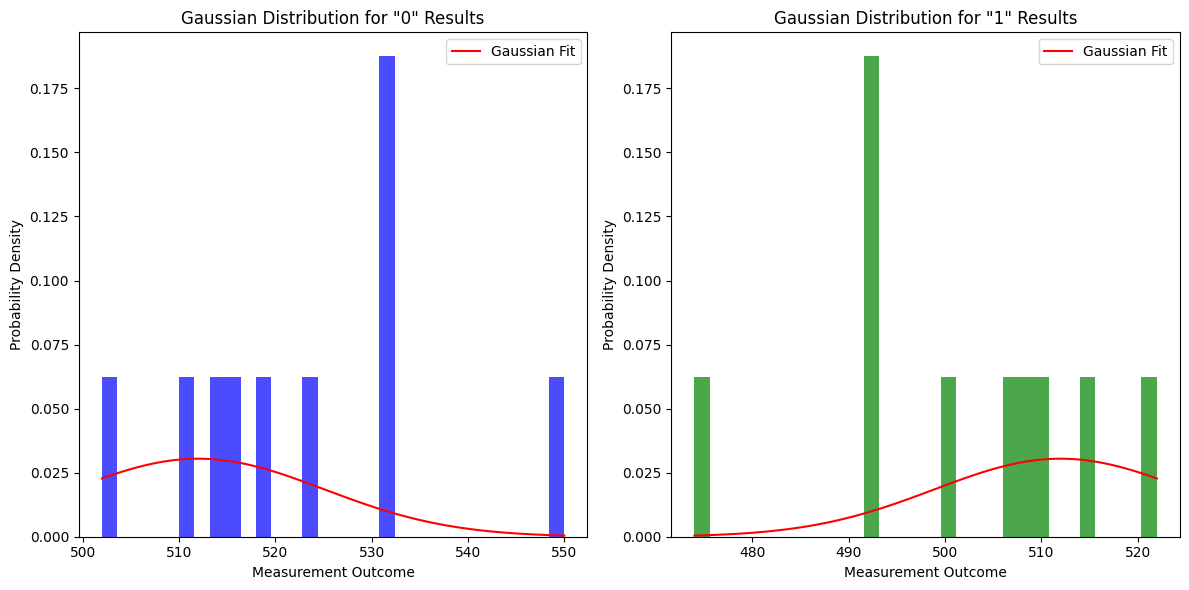

Traceback (most recent call last):
  Cell In[2], line 127
    bit_flip.draw(output='mpl', color_scheme='bw')
TypeError: QuantumCircuit.draw() got an unexpected keyword argument 'color_scheme'

Use %tb to get the full traceback.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator

# Number of times to repeat the circuit
n = 10000

# Define the circuit
bit_flip = QuantumCircuit(1,1)

# Prepares qubit in the desired initial |+> state 
bit_flip.h(0)

# Measure
bit_flip.measure(0,0)

# Print the quantum circuit
print("Quantum Circuit:")
print(bit_flip)

# Simulate the circuit using the Aer simulator
simulator = AerSimulator(method='statevector')

# Lists to store the '0' and '1' measurement outcomes (it's necessary to be able to calculate
results_0 = []
results_1 = []

# Create a file to write measurements
with open('measurements_0_h.txt', 'w') as file0, open('measurements_1_h.txt', 'w') as file1:
    for i in range(n):
        # Compile the circuit
        compiled_circuit = transpile(bit_flip, simulator)

        # Run the circuit
        job = simulator.run(compiled_circuit)

        # Get the result
        result = job.result()

        # Get the counts for '00' and '11' outcomes
        counts = result.get_counts()
        count_0 = counts.get('0', 0)
        count_1 = counts.get('1', 0)
    
        # Write the measurement outcomes to the file in columns
        file0.write(f"{count_0}")
        
        # Return for readability
        file0.write("\n")

        # Write the measurement outcomes to the file in columns
        file1.write(f"{count_1}")
        
        # Return for readability
        file1.write("\n")
        
        # Append the outcomes to the lists
        results_0.append(count_0)
        results_1.append(count_1)
        
# Calculate the standard deviation for '0' and '1' outcomes
std_deviation_0 = np.std(results_0, ddof = 0)
std_deviation_1 = np.std(results_1, ddof = 0)

# Get the mean value for '0' and '1':
mean_0 = np.mean(results_0)
mean_1 = np.mean(results_1)

# Print the standard deviations
print(f"Standard Deviation of '0' Results: {std_deviation_0:.4f}")
print(f"Standard Deviation of '1' Results: {std_deviation_1:.4f}")

# Print mean
print(f"Mean of '0' Results: {mean_0:.4f}")
print(f"Mean of '1' Results: {mean_1:.4f}")

print("Measurement outcomes have been saved to 'measurements_0_h.txt' and 'measurements_1_h.txt' with columns for '0' and '1' results.")

## PLot the results into a Gaussian distribution

# Plot the '00' and '11' measurement results as Gaussian distributions
plt.figure(figsize=(12, 6))

# Plot '00' results
plt.subplot(1, 2, 1)
plt.hist(results_0, bins=30, density=True, color='blue', alpha=0.7)
plt.title('Gaussian Distribution for "0" Results')
plt.xlabel('Measurement Outcome')
plt.ylabel('Probability Density')

# Create a range of x values for the Gaussian curve
x_0 = np.linspace(min(results_0), max(results_0), 100)
# Calculate the Gaussian curve for '00' results
gaussian_0 = 1 / (std_deviation_0 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_0 - 512) / std_deviation_0)**2)

# Plot the Gaussian curve
plt.plot(x_0, gaussian_0, 'r-', label='Gaussian Fit')
plt.legend()

# Plot '11' results
plt.subplot(1, 2, 2)
plt.hist(results_1, bins=30, density=True, color='green', alpha=0.7)
plt.title('Gaussian Distribution for "1" Results')
plt.xlabel('Measurement Outcome')
plt.ylabel('Probability Density')

# Create a range of x values for the Gaussian curve
x_1 = np.linspace(min(results_1), max(results_1), 100)
# Calculate the Gaussian curve for '11' results
gaussian_1 = 1 / (std_deviation_1 * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x_1 - 512) / std_deviation_1)**2)

# Plot the Gaussian curve
plt.plot(x_1, gaussian_1, 'r-', label='Gaussian Fit')
plt.legend()

# Save the figure as a PNG file
plt.savefig('gaussian_h_c.png')

print("The plot has been saved into the PNG file 'gaussian_h_c.png'")

plt.tight_layout()
plt.show()

# Draw
bit_flip.draw(output='mpl', color_scheme='bw')